In [76]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, timedelta


In [77]:
inu_df = pd.read_csv("../dataset/raw/inu_bank.csv")

In [78]:
inu_df.shape

(1554, 18)

In [79]:
inu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1554 entries, 0 to 1553
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_ID    1554 non-null   int64  
 1   Transaction_Type  1554 non-null   object 
 2   Amount            1554 non-null   float64
 3   Transaction_Date  1554 non-null   object 
 4   Customer_ID       1554 non-null   int64  
 5   Full_Name         1554 non-null   object 
 6   Email             1554 non-null   object 
 7   Phone             1554 non-null   object 
 8   Account_ID        1554 non-null   int64  
 9   Account_Type      1554 non-null   object 
 10  Balance           1554 non-null   float64
 11  Opening_Date      1554 non-null   object 
 12  Loan_ID           1278 non-null   float64
 13  Loan_Amount       1278 non-null   float64
 14  Loan_Type         1278 non-null   object 
 15  Start_Date        1278 non-null   object 
 16  End_Date          1278 non-null   object 


In [80]:
inu_df.head(10)

,Transaction_ID,Transaction_Type,Amount,Transaction_Date,Customer_ID,Full_Name,Email,Phone,Account_ID,Account_Type,Balance,Opening_Date,Loan_ID,Loan_Amount,Loan_Type,Start_Date,End_Date,Interest_Rate
0,1,withdrawal,102.15,2023-04-26,85,Carol Miller,yfisher@example.org,6088279027,88,Savings,5652.16,2019-08-12,NaN,NaN,NaN,NaN,NaN,NaN
1,2,withdrawal,358.80,2020-06-13,91,Geoffrey Banks,gonzalesgeorge@example.net,001-546-857-6518x5359,26,Credit,2881.24,2019-05-06,44.0,32428.90,Mortgage,2021-06-24,2050-01-08 04:59:17.907588,2.12
2,2,withdrawal,358.80,2020-06-13,91,Geoffrey Banks,gonzalesgeorge@example.net,001-546-857-6518x5359,26,Credit,2881.24,2019-05-06,48.0,31406.77,Personal,2021-02-27,2038-10-12 04:59:17.907821,4.63
3,2,withdrawal,358.80,2020-06-13,91,Geoffrey Banks,gonzalesgeorge@example.net,001-546-857-6518x5359,26,Credit,2881.24,2019-05-06,76.0,27834.00,Personal,2019-12-05,2037-08-15 04:59:17.909497,2.15
4,2,withdrawal,358.80,2020-06-13,91,Geoffrey Banks,gonzalesgeorge@example.net,001-546-857-6518x5359,26,Credit,2881.24,2019-05-06,138.0,27873.08,Auto,2022-01-19,2037-06-03 04:59:17.913974,7.03
5,3,deposit,112.41,2019-05-17,89,Eric Phillips,mark13@example.com,(699)516-7638x82918,152,Savings,2391.90,2020-09-17,13.0,25666.75,Auto,2023-05-09,2039-04-28 04:59:17.905741,6.84
6,3,deposit,112.41,2019-05-17,89,Eric Phillips,mark13@example.com,(699)516-7638x82918,152,Savings,2391.90,2020-09-17,95.0,23853.85,Personal,2024-01-30,2038-02-12 04:59:17.910713,7.41
7,3,deposit,112.41,2019-05-17,89,Eric Phillips,mark13@example.com,(699)516-7638x82918,152,Savings,2391.90,2020-09-17,104.0,8092.20,Personal,2021-08-18,2036-04-08 04:59:17.911277,2.85
8,4,deposit,463.13,2020-09-02,83,Paul Noble,harrisonrachel@example.net,+1-586-758-3968x3144,156,Credit,7880.53,2023-08-14,61.0,11074.47,Personal,2022-02-11,2032-05-06 04:59:17.908590,5.36
9,4,deposit,463.13,2020-09-02,83,Paul Noble,harrisonrachel@example.net,+1-586-758-3968x3144,156,Credit,7880.53,2023-08-14,77.0,38903.23,Personal,2021-07-14,2042-10-07 04:59:17.909559,2.28


In [81]:
inu_df.isnull().sum()

Transaction_ID        0
Transaction_Type      0
Amount                0
Transaction_Date      0
Customer_ID           0
Full_Name             0
Email                 0
Phone                 0
Account_ID            0
Account_Type          0
Balance               0
Opening_Date          0
Loan_ID             276
Loan_Amount         276
Loan_Type           276
Start_Date          276
End_Date            276
Interest_Rate       276
dtype: int64

In [ ]:
# Filling missing values

inu_df.fillna({
    'Loan_ID': 'None',
    'Loan_Amount': 0.00,
    'Loan_Type': 'None',
    # 'Start_Date': '00-00-0000',
    # 'End_Date': '00-00-0000',
    'Interest_Rate': 0.0
}, inplace=True)

inu_df['Start_Date'] = pd.to_datetime(inu_df['Start_Date'], errors='coerce')
inu_df['End_Date'] = pd.to_datetime(inu_df['End_Date'], errors='coerce')


inu_df.head(10)

,Transaction_ID,Transaction_Type,Amount,Transaction_Date,Customer_ID,Full_Name,Email,Phone,Account_ID,Account_Type,Balance,Opening_Date,Loan_ID,Loan_Amount,Loan_Type,Start_Date,End_Date,Interest_Rate
0,1,withdrawal,102.15,2023-04-26,85,Carol Miller,yfisher@example.org,6088279027,88,Savings,5652.16,2019-08-12,None,0.00,None,NaT,NaT,0.00
1,2,withdrawal,358.80,2020-06-13,91,Geoffrey Banks,gonzalesgeorge@example.net,001-546-857-6518x5359,26,Credit,2881.24,2019-05-06,44.0,32428.90,Mortgage,2021-06-24,2050-01-08 04:59:17.907588,2.12
2,2,withdrawal,358.80,2020-06-13,91,Geoffrey Banks,gonzalesgeorge@example.net,001-546-857-6518x5359,26,Credit,2881.24,2019-05-06,48.0,31406.77,Personal,2021-02-27,2038-10-12 04:59:17.907821,4.63
3,2,withdrawal,358.80,2020-06-13,91,Geoffrey Banks,gonzalesgeorge@example.net,001-546-857-6518x5359,26,Credit,2881.24,2019-05-06,76.0,27834.00,Personal,2019-12-05,2037-08-15 04:59:17.909497,2.15
4,2,withdrawal,358.80,2020-06-13,91,Geoffrey Banks,gonzalesgeorge@example.net,001-546-857-6518x5359,26,Credit,2881.24,2019-05-06,138.0,27873.08,Auto,2022-01-19,2037-06-03 04:59:17.913974,7.03
5,3,deposit,112.41,2019-05-17,89,Eric Phillips,mark13@example.com,(699)516-7638x82918,152,Savings,2391.90,2020-09-17,13.0,25666.75,Auto,2023-05-09,2039-04-28 04:59:17.905741,6.84
6,3,deposit,112.41,2019-05-17,89,Eric Phillips,mark13@example.com,(699)516-7638x82918,152,Savings,2391.90,2020-09-17,95.0,23853.85,Personal,2024-01-30,2038-02-12 04:59:17.910713,7.41
7,3,deposit,112.41,2019-05-17,89,Eric Phillips,mark13@example.com,(699)516-7638x82918,152,Savings,2391.90,2020-09-17,104.0,8092.20,Personal,2021-08-18,2036-04-08 04:59:17.911277,2.85
8,4,deposit,463.13,2020-09-02,83,Paul Noble,harrisonrachel@example.net,+1-586-758-3968x3144,156,Credit,7880.53,2023-08-14,61.0,11074.47,Personal,2022-02-11,2032-05-06 04:59:17.908590,5.36
9,4,deposit,463.13,2020-09-02,83,Paul Noble,harrisonrachel@example.net,+1-586-758-3968x3144,156,Credit,7880.53,2023-08-14,77.0,38903.23,Personal,2021-07-14,2042-10-07 04:59:17.909559,2.28


In [83]:
inu_df.duplicated().sum()

np.int64(0)

In [84]:
# Changing the date format

inu_df['Transaction_Date'] = pd.to_datetime(inu_df['Transaction_Date'])
inu_df['Transaction_Date'] = inu_df['Transaction_Date'].dt.strftime('%d-%m-%Y %H:%M')

inu_df['Opening_Date'] = pd.to_datetime(inu_df['Opening_Date'])
inu_df['Opening_Date'] = inu_df['Opening_Date'].dt.strftime('%d-%m-%Y %H:%M')

inu_df['Start_Date'] = pd.to_datetime(inu_df['Start_Date'])
inu_df['Start_Date'] = inu_df['Start_Date'].dt.strftime('%d-%m-%Y %H:%M')

inu_df['End_Date'] = pd.to_datetime(inu_df['End_Date'])
inu_df['End_Date'] = inu_df['End_Date'].dt.strftime('%d-%m-%Y %H:%M')

inu_df.head()

,Transaction_ID,Transaction_Type,Amount,Transaction_Date,Customer_ID,Full_Name,Email,Phone,Account_ID,Account_Type,Balance,Opening_Date,Loan_ID,Loan_Amount,Loan_Type,Start_Date,End_Date,Interest_Rate
0,1,withdrawal,102.15,26-04-2023 00:00,85,Carol Miller,yfisher@example.org,6088279027,88,Savings,5652.16,12-08-2019 00:00,None,0.00,None,NaN,NaN,0.00
1,2,withdrawal,358.80,13-06-2020 00:00,91,Geoffrey Banks,gonzalesgeorge@example.net,001-546-857-6518x5359,26,Credit,2881.24,06-05-2019 00:00,44.0,32428.90,Mortgage,24-06-2021 00:00,08-01-2050 04:59,2.12
2,2,withdrawal,358.80,13-06-2020 00:00,91,Geoffrey Banks,gonzalesgeorge@example.net,001-546-857-6518x5359,26,Credit,2881.24,06-05-2019 00:00,48.0,31406.77,Personal,27-02-2021 00:00,12-10-2038 04:59,4.63
3,2,withdrawal,358.80,13-06-2020 00:00,91,Geoffrey Banks,gonzalesgeorge@example.net,001-546-857-6518x5359,26,Credit,2881.24,06-05-2019 00:00,76.0,27834.00,Personal,05-12-2019 00:00,15-08-2037 04:59,2.15
4,2,withdrawal,358.80,13-06-2020 00:00,91,Geoffrey Banks,gonzalesgeorge@example.net,001-546-857-6518x5359,26,Credit,2881.24,06-05-2019 00:00,138.0,27873.08,Auto,19-01-2022 00:00,03-06-2037 04:59,7.03


In [85]:
# Splitting FullName into two columns, FirstName and LastName.

inu_df[['First_Name', 'Last_Name']] = inu_df['Full_Name'].str.split(expand=True)
inu_df.drop(columns=['Full_Name'], inplace=True)
inu_df = inu_df[['Transaction_ID', 'Transaction_Type', 'Amount', 'Transaction_Date',
       'Customer_ID', 'First_Name', 'Last_Name', 'Email', 'Phone', 'Account_ID', 'Account_Type',
       'Balance', 'Opening_Date', 'Loan_ID', 'Loan_Amount', 'Loan_Type',
       'Start_Date', 'End_Date', 'Interest_Rate']]

In [86]:
inu_df.columns

Index(['Transaction_ID', 'Transaction_Type', 'Amount', 'Transaction_Date',
       'Customer_ID', 'First_Name', 'Last_Name', 'Email', 'Phone',
       'Account_ID', 'Account_Type', 'Balance', 'Opening_Date', 'Loan_ID',
       'Loan_Amount', 'Loan_Type', 'Start_Date', 'End_Date', 'Interest_Rate'],
      dtype='object')

#### Creating tables

In [87]:
customer_df = inu_df[['Customer_ID', 'First_Name', 'Last_Name', 'Email', 'Phone']].copy().drop_duplicates().reset_index(drop=True)

customer_df.head()

,Customer_ID,First_Name,Last_Name,Email,Phone
0,85,Carol,Miller,yfisher@example.org,6088279027
1,91,Geoffrey,Banks,gonzalesgeorge@example.net,001-546-857-6518x5359
2,89,Eric,Phillips,mark13@example.com,(699)516-7638x82918
3,83,Paul,Noble,harrisonrachel@example.net,+1-586-758-3968x3144
4,28,Ryan,Alexander,loganjohn@example.org,900.377.1792x148


In [88]:
account_df = inu_df[['Account_ID', 'Account_Type', 'Balance', 'Opening_Date', 'Customer_ID']].copy().drop_duplicates().reset_index(drop=True)

account_df.head()

,Account_ID,Account_Type,Balance,Opening_Date,Customer_ID
0,88,Savings,5652.16,12-08-2019 00:00,85
1,26,Credit,2881.24,06-05-2019 00:00,91
2,152,Savings,2391.90,17-09-2020 00:00,89
3,156,Credit,7880.53,14-08-2023 00:00,83
4,110,Credit,3020.69,13-08-2019 00:00,28


In [89]:
transaction_df = inu_df[['Transaction_ID', 'Transaction_Type', 'Amount', 'Transaction_Date', 'Customer_ID']].copy().drop_duplicates().reset_index(drop=True)

transaction_df.head()

,Transaction_ID,Transaction_Type,Amount,Transaction_Date,Customer_ID
0,1,withdrawal,102.15,26-04-2023 00:00,85
1,2,withdrawal,358.80,13-06-2020 00:00,91
2,3,deposit,112.41,17-05-2019 00:00,89
3,4,deposit,463.13,02-09-2020 00:00,83
4,5,withdrawal,21.94,03-07-2022 00:00,28


In [90]:
loan_df = inu_df[['Loan_ID', 'Loan_Amount', 'Loan_Type', 'Start_Date', 'End_Date', 'Interest_Rate', 'Customer_ID']].copy().drop_duplicates().reset_index(drop=True)

loan_df.head()

,Loan_ID,Loan_Amount,Loan_Type,Start_Date,End_Date,Interest_Rate,Customer_ID
0,None,0.00,None,NaN,NaN,0.00,85
1,44.0,32428.90,Mortgage,24-06-2021 00:00,08-01-2050 04:59,2.12,91
2,48.0,31406.77,Personal,27-02-2021 00:00,12-10-2038 04:59,4.63,91
3,76.0,27834.00,Personal,05-12-2019 00:00,15-08-2037 04:59,2.15,91
4,138.0,27873.08,Auto,19-01-2022 00:00,03-06-2037 04:59,7.03,91


In [91]:
inu_df = customer_df \
    .merge(account_df, on='Customer_ID', how='left') \
    .merge(transaction_df, on='Customer_ID', how='left') \
    .merge(loan_df, on='Customer_ID', how='left')

#### Building Customer Profiles

In [ ]:
# Grouping customers by their IDs, adding all accounts each customer has, and calculating the aevrage balance across the accounts.

grouped = account_df.groupby('Customer_ID')
num_accounts = grouped.size()
avg_balance = grouped['Balance'].mean()

In [93]:
account_features = pd.DataFrame({
    'Customer_ID': num_accounts.index,
    'num_accounts': num_accounts.values,
    'avg_balance': avg_balance.values
})

account_features.head()

,Customer_ID,num_accounts,avg_balance
0,1,3,4445.143333
1,3,1,660.410000
2,4,1,5566.770000
3,5,5,5653.374000
4,6,2,5383.230000


In [94]:
grouped = transaction_df.groupby('Customer_ID')
num_transactions = grouped.size()
avg_transactions = grouped['Amount'].mean()

In [95]:
transaction_features = pd.DataFrame({
    'Customer_ID': num_transactions.index,
    'num_transactions': num_transactions.values,
    'avg_transactions': avg_transactions.values
})

transaction_features.head()

,Customer_ID,num_transactions,avg_transactions
0,1,14,246.874286
1,3,6,257.370000
2,4,10,288.290000
3,5,28,263.037143
4,6,8,297.376250


In [96]:
grouped = loan_df.groupby('Customer_ID')
num_loans = grouped.size()
avg_loans = grouped['Loan_Amount'].mean()

In [97]:
loan_features = pd.DataFrame({
    'Customer_ID': num_loans.index,
    'num_loans': num_loans.values,
    'avg_loans': avg_loans.values
})

loan_features.head()

,Customer_ID,num_loans,avg_loans
0,1,1,0.000000
1,3,3,39479.333333
2,4,2,27607.140000
3,5,1,12965.190000
4,6,2,48679.025000


In [98]:
customer_features = account_features \
        .merge(transaction_features, on='Customer_ID', how='left') \
        .merge(loan_features, on='Customer_ID', how='left')

customer_features.head()

,Customer_ID,num_accounts,avg_balance,num_transactions,avg_transactions,num_loans,avg_loans
0,1,3,4445.143333,14,246.874286,1,0.000000
1,3,1,660.410000,6,257.370000,3,39479.333333
2,4,1,5566.770000,10,288.290000,2,27607.140000
3,5,5,5653.374000,28,263.037143,1,12965.190000
4,6,2,5383.230000,8,297.376250,2,48679.025000


In [99]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = customer_features.drop(columns=['Customer_ID'])
X_scaled = scaler.fit_transform(X)

In [100]:
scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
scaled_df['Customer_ID'] = customer_features['Customer_ID'].values

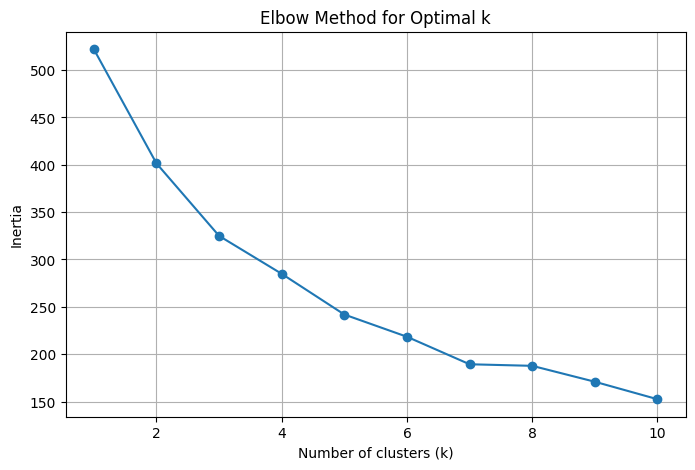

In [101]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

inertia_scores = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_scores.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia_scores, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [102]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_
scaled_df['Cluster'] = cluster_labels

In [103]:
cluster_summary = scaled_df.groupby('Cluster').mean()
print(cluster_summary)

         num_accounts  avg_balance  num_transactions  avg_transactions  \
Cluster                                                                  
0       -6.891039e-17    -0.005063         -0.069414          0.196182   
1       -5.256593e-01     0.690722         -0.579082         -0.391242   
2        1.257869e+00     0.104395          1.466756          0.137835   
3       -6.266137e-01    -1.144351         -0.655664          0.076219   

         num_loans  avg_loans  Customer_ID  
Cluster                                     
0        -0.713331  -1.214897    50.586207  
1         0.290124   0.762246    45.416667  
2        -0.250198   0.413265    61.555556  
3         1.139201   0.593709    53.625000  


In [106]:
# Changing to readable names

cluster_names = {
    0: "Steady Customers",
    1: "Wealthy Inactives",
    2: "Most-Active Customers",
    3: "Loan-Heavy Customers"
}

scaled_df['Segment'] = scaled_df['Cluster'].map(cluster_names)
segment_summary = scaled_df.groupby('Segment').mean()
print(segment_summary)


                       num_accounts  avg_balance  num_transactions  \
Segment                                                              
Loan-Heavy Customers  -6.266137e-01    -1.144351         -0.655664   
Most-Active Customers  1.257869e+00     0.104395          1.466756   
Steady Customers      -6.891039e-17    -0.005063         -0.069414   
Wealthy Inactives     -5.256593e-01     0.690722         -0.579082   

                       avg_transactions  num_loans  avg_loans  Customer_ID  \
Segment                                                                      
Loan-Heavy Customers           0.076219   1.139201   0.593709    53.625000   
Most-Active Customers          0.137835  -0.250198   0.413265    61.555556   
Steady Customers               0.196182  -0.713331  -1.214897    50.586207   
Wealthy Inactives             -0.391242   0.290124   0.762246    45.416667   

                       Cluster  
Segment                         
Loan-Heavy Customers       3.0  
Most-Active

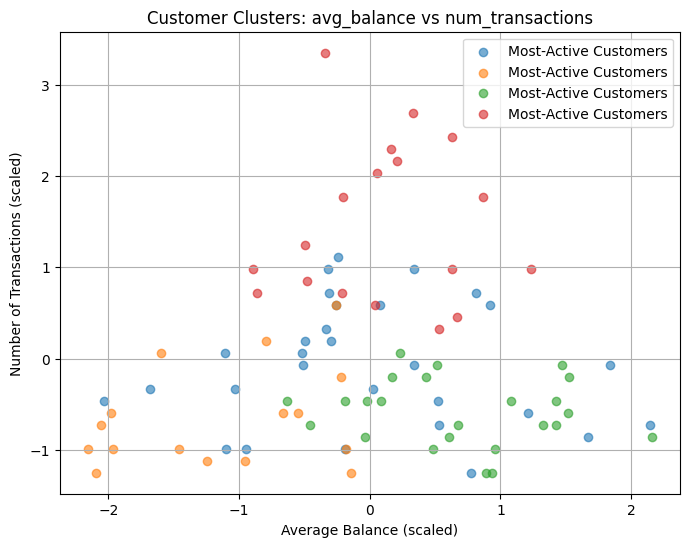

In [113]:
plt.figure(figsize=(8, 6))

# Plotting each cluster with a different color
for cluster in scaled_df['Segment'].unique():
    cluster_data = scaled_df[scaled_df['Segment'] == cluster]
    plt.scatter(
        cluster_data['avg_balance'],
        cluster_data['num_transactions'],
        label=segment,
        alpha=0.6
    )

plt.title('Customer Clusters: avg_balance vs num_transactions')
plt.xlabel('Average Balance (scaled)')
plt.ylabel('Number of Transactions (scaled)')
plt.legend()
plt.grid(True)
plt.show()


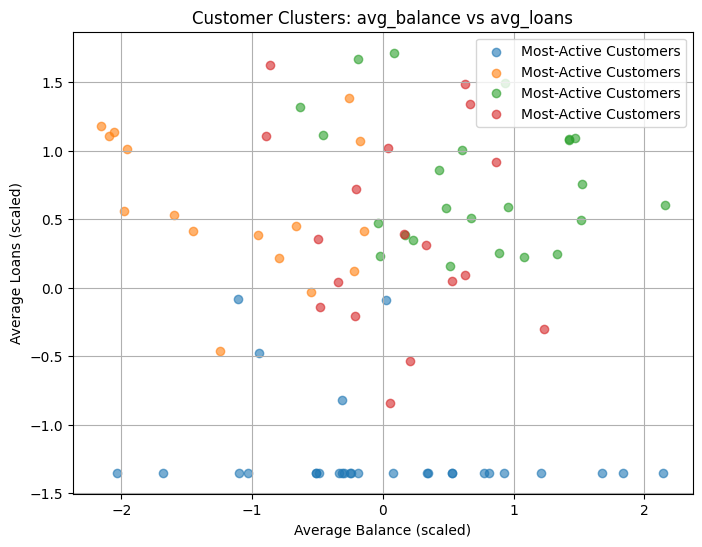

In [114]:
plt.figure(figsize=(8, 6))

# Plotting each cluster with a different color
for cluster in scaled_df['Segment'].unique():
    cluster_data = scaled_df[scaled_df['Segment'] == cluster]
    plt.scatter(
        cluster_data['avg_balance'],
        cluster_data['avg_loans'],
        label=segment,
        alpha=0.6
    )

plt.title('Customer Clusters: avg_balance vs avg_loans')
plt.xlabel('Average Balance (scaled)')
plt.ylabel('Average Loans (scaled)')
plt.legend()
plt.grid(True)
plt.show()


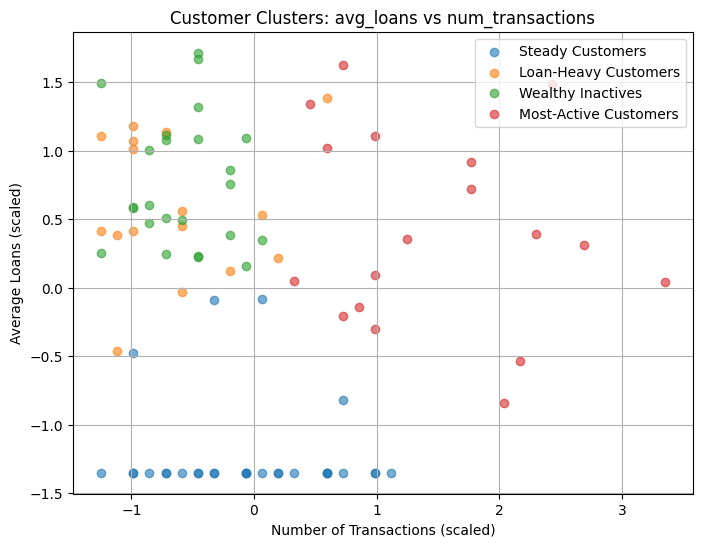

In [116]:
plt.figure(figsize=(8, 6))

# Plotting each segment with a different color
for segment in scaled_df['Segment'].unique():
    segment_data = scaled_df[scaled_df['Segment'] == segment]
    plt.scatter(
        segment_data['num_transactions'],
        segment_data['avg_loans'],
        label=segment,
        alpha=0.6
    )

plt.title('Customer Clusters: avg_loans vs num_transactions')
plt.xlabel('Number of Transactions (scaled)')
plt.ylabel('Average Loans (scaled)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Noticed an outlier among the Wealthy Inactives; number of transaction lies above the 0 mark.
outlier = scaled_df[
    (scaled_df['Segment'] == 'Wealthy Inactives') &
    (scaled_df['num_transactions'] > 0)
]

print(outlier)

    num_accounts  avg_balance  num_transactions  avg_transactions  num_loans  \
31      0.584839      0.23433          0.066396         -1.294528   0.212935   

    avg_loans  Customer_ID  Cluster            Segment  
31   0.348217           38        1  Wealthy Inactives  
